<a href="https://colab.research.google.com/github/AnvayM/Data-Science/blob/House_Price/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home. **

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
path="/content/drive/MyDrive/Colab Notebooks/House/train.csv"
path2="/content/drive/MyDrive/Colab Notebooks/House/test.csv"
path3="/content/drive/MyDrive/Colab Notebooks/House/sample_submission.csv"
house_train=pd.read_csv(path)
house_test=pd.read_csv(path2)
sample_submission=pd.read_csv(path3)


##**With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home**.

In [44]:
house_train.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

##We will DO Feature selection 

In [45]:
numerical_list=["int16","int32","int64","float16","float32","float64"]

In [46]:
numerical_col=list(house_train.select_dtypes(numerical_list).columns)

In [47]:
numerical_col


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [48]:
#assigning numerical column to house_train.
house_train=house_train[numerical_col]

house_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [49]:
X=house_train.drop("SalePrice",axis=1)

In [50]:
y=house_train["SalePrice"]


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [52]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,65,60,NaN,9375,7,5,1997,1998,573.0,739,0,318,1057,1057,977,0,2034,1,0,2,1,3,1,8,0,1998.0,2,645,576,36,0,0,0,0,0,2,2009
682,683,120,NaN,2887,6,5,1996,1997,0.0,1003,0,288,1291,1291,0,0,1291,1,0,1,0,2,1,6,1,1996.0,2,431,307,0,0,0,0,0,0,11,2008
960,961,20,50.0,7207,5,7,1958,2008,0.0,696,0,162,858,858,0,0,858,1,0,1,0,2,1,4,0,NaN,0,0,117,0,0,0,0,0,0,2,2010
1384,1385,50,60.0,9060,6,5,1939,1950,0.0,204,0,356,560,698,560,0,1258,0,0,1,0,2,1,6,0,1939.0,1,280,0,0,0,0,0,0,0,10,2009
1100,1101,30,60.0,8400,2,5,1920,1950,0.0,290,0,0,290,438,0,0,438,0,0,1,0,1,1,3,0,1930.0,1,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,82.0,9430,8,5,1999,1999,673.0,1163,0,89,1252,1268,1097,0,2365,1,0,2,1,3,1,8,1,1999.0,3,856,0,128,0,0,180,0,0,7,2009
835,836,20,60.0,9600,4,7,1950,1995,0.0,442,0,625,1067,1067,0,0,1067,0,0,2,0,2,1,4,0,1996.0,2,436,290,0,0,0,0,0,0,2,2010
1216,1217,90,68.0,8930,6,5,1978,1978,0.0,0,0,0,0,1318,584,0,1902,0,0,2,0,4,2,8,0,1978.0,2,539,0,0,0,0,0,0,0,4,2010
559,560,120,NaN,3196,7,5,2003,2004,18.0,0,0,1374,1374,1557,0,0,1557,0,0,2,0,2,1,7,1,2003.0,2,420,143,20,0,0,0,0,0,10,2006


In [61]:
X_train.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [62]:
X_train["LotFrontage"].mean()

69.6685440313111

In [ ]:
X_train.fillna({"LotFrontage":69.668},inplace=True)

In [ ]:
X_train.fillna({"MasVnrArea":X_train["MasVnrArea"].mean()},inplace=True)

In [ ]:
X_train.fillna({"GarageYrBlt":X_train["GarageYrBlt"].mean()},inplace=True)

In [66]:
mutual_info=mutual_info_regression(X_train,y_train)
mutual_info

array([0.        , 0.26178285, 0.20869198, 0.16368313, 0.53180784,
       0.1041171 , 0.34705552, 0.24877306, 0.10299724, 0.1577438 ,
       0.00545974, 0.1145846 , 0.38091862, 0.31162371, 0.22522214,
       0.00862361, 0.48024875, 0.02237596, 0.        , 0.2712157 ,
       0.07563078, 0.03791518, 0.00339269, 0.1911023 , 0.18678343,
       0.26202049, 0.37363557, 0.367144  , 0.06947756, 0.17111621,
       0.02431615, 0.00099688, 0.0185159 , 0.        , 0.        ,
       0.        , 0.00745912])

In [67]:
#Creating a series of mutual info
mutual_info=pd.Series(mutual_info)
mutual_info

0     0.000000
1     0.261783
2     0.208692
3     0.163683
4     0.531808
5     0.104117
6     0.347056
7     0.248773
8     0.102997
9     0.157744
10    0.005460
11    0.114585
12    0.380919
13    0.311624
14    0.225222
15    0.008624
16    0.480249
17    0.022376
18    0.000000
19    0.271216
20    0.075631
21    0.037915
22    0.003393
23    0.191102
24    0.186783
25    0.262020
26    0.373636
27    0.367144
28    0.069478
29    0.171116
30    0.024316
31    0.000997
32    0.018516
33    0.000000
34    0.000000
35    0.000000
36    0.007459
dtype: float64

In [68]:
mutual_info.index=X_train.columns
mutual_info

Id               0.000000
MSSubClass       0.261783
LotFrontage      0.208692
LotArea          0.163683
OverallQual      0.531808
OverallCond      0.104117
YearBuilt        0.347056
YearRemodAdd     0.248773
MasVnrArea       0.102997
BsmtFinSF1       0.157744
BsmtFinSF2       0.005460
BsmtUnfSF        0.114585
TotalBsmtSF      0.380919
1stFlrSF         0.311624
2ndFlrSF         0.225222
LowQualFinSF     0.008624
GrLivArea        0.480249
BsmtFullBath     0.022376
BsmtHalfBath     0.000000
FullBath         0.271216
HalfBath         0.075631
BedroomAbvGr     0.037915
KitchenAbvGr     0.003393
TotRmsAbvGrd     0.191102
Fireplaces       0.186783
GarageYrBlt      0.262020
GarageCars       0.373636
GarageArea       0.367144
WoodDeckSF       0.069478
OpenPorchSF      0.171116
EnclosedPorch    0.024316
3SsnPorch        0.000997
ScreenPorch      0.018516
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.007459
dtype: float64

In [69]:
mutual_info.sort_values(ascending=False)


OverallQual      0.531808
GrLivArea        0.480249
TotalBsmtSF      0.380919
GarageCars       0.373636
GarageArea       0.367144
YearBuilt        0.347056
1stFlrSF         0.311624
FullBath         0.271216
GarageYrBlt      0.262020
MSSubClass       0.261783
YearRemodAdd     0.248773
2ndFlrSF         0.225222
LotFrontage      0.208692
TotRmsAbvGrd     0.191102
Fireplaces       0.186783
OpenPorchSF      0.171116
LotArea          0.163683
BsmtFinSF1       0.157744
BsmtUnfSF        0.114585
OverallCond      0.104117
MasVnrArea       0.102997
HalfBath         0.075631
WoodDeckSF       0.069478
BedroomAbvGr     0.037915
EnclosedPorch    0.024316
BsmtFullBath     0.022376
ScreenPorch      0.018516
LowQualFinSF     0.008624
YrSold           0.007459
BsmtFinSF2       0.005460
KitchenAbvGr     0.003393
3SsnPorch        0.000997
BsmtHalfBath     0.000000
MoSold           0.000000
PoolArea         0.000000
MiscVal          0.000000
Id               0.000000
dtype: float64

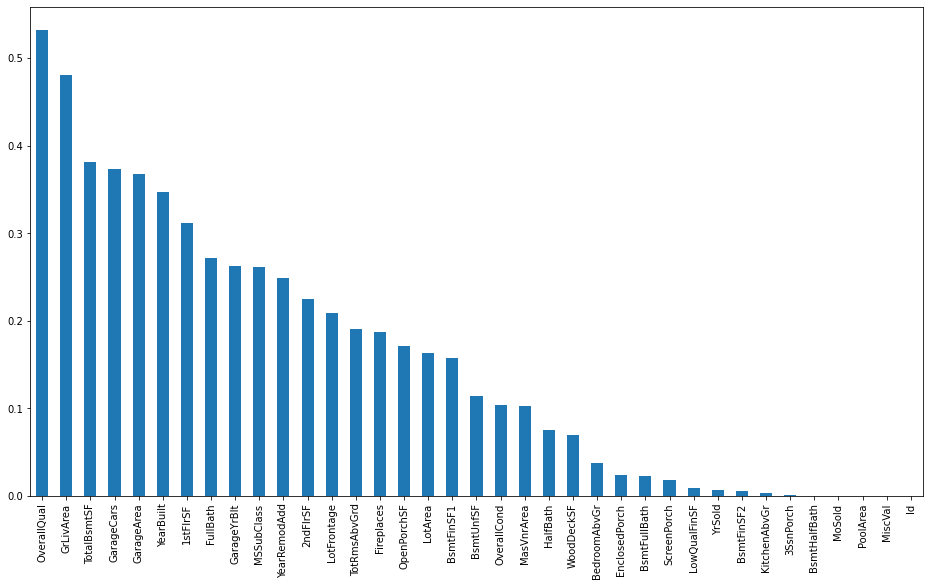

In [70]:
#plotting the bar which shows the variables having high impact on independent var
mutual_info.sort_values(ascending=False).plot.bar(figsize=(16,9))

In [71]:
 select_top_columns= SelectPercentile(mutual_info_regression,percentile=20)
 select_top_columns.fit(X_train,y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7fadc24d9e60>)

In [72]:
p=X_train.columns[select_top_columns.get_support()]

In [73]:
select_top_columns.get_support(True)

array([ 4,  6, 12, 13, 16, 19, 26, 27])

In [74]:
select_top_columns.get_support(False)

array([False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [75]:
p

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea'],
      dtype='object')

In [76]:
X_train=X_train[p]
X_test=X_test[p]


In [77]:
X_train

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
64,7,1997,1057,1057,2034,2,2,645
682,6,1996,1291,1291,1291,1,2,431
960,5,1958,858,858,858,1,0,0
1384,6,1939,560,698,1258,1,1,280
1100,2,1920,290,438,438,1,1,246
...,...,...,...,...,...,...,...,...
763,8,1999,1252,1268,2365,2,3,856
835,4,1950,1067,1067,1067,2,2,436
1216,6,1978,0,1318,1902,2,2,539
559,7,2003,1374,1557,1557,2,2,420


In [78]:

sc=StandardScaler()

In [79]:

sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [81]:
lr=LinearRegression()

In [82]:
lr.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
lr.coef_

array([25478.47360691, 11060.74205715, 12019.5594209 ,  4219.60871179,
       29804.95914474, -3476.80438727,   737.40065312,  9885.11376791])

In [84]:
lr.intercept_

180586.22896281802

In [85]:
X_test_sc[0,:]

array([-0.05839596, -0.46117929,  2.38920418,  3.62029584,  1.91836248,
        2.62969319,  0.32139819,  0.06996248])

In [86]:
lr.predict([X_test_sc[0,:]])

array([266953.19010053])

In [87]:
X_test_sc

array([[-0.05839596, -0.46117929,  2.38920418, ...,  2.62969319,
         0.32139819,  0.06996248],
       [-0.05839596, -0.990498  , -0.60810332, ..., -1.06452872,
        -1.04154351, -1.09913238],
       [-0.79519441, -0.69275623, -0.84466868, ..., -1.06452872,
        -1.04154351, -0.56249868],
       ...,
       [ 1.41520093,  0.79595266,  2.56967673, ...,  0.78258224,
         1.6843399 ,  1.77089966],
       [ 0.67840248,  1.0275296 ,  1.2624702 , ...,  0.78258224,
         0.32139819,  0.35744482],
       [ 2.15199937,  1.25910653,  3.10865554, ...,  0.78258224,
         1.6843399 ,  1.67986359]])

In [88]:
lr.predict(X_test_sc)

array([266953.19010053, 153818.9769293 , 119442.63512668, 231079.75645395,
       124820.57899449, 100632.97799357, 254497.94317738, 152291.95328514,
       495239.28624013, 162113.2908931 , 209101.05353079, 195721.2859853 ,
       229133.94209187, 108834.68290453, 137307.1362811 , 147165.48785272,
       220570.8074971 ,  95188.61680602, 140925.07113126, 176334.31477949,
       147781.23645889, 144352.49010476, 111982.23525804, 161149.50754765,
       194462.79396469, 191689.57281396, 175576.56320585,  51058.36946344,
       296294.31409276, 120281.89577995, 210988.61109443, 204916.24695043,
       142787.44502923, 284522.17426606, 315183.69101727, 182718.40244492,
       271064.45947934, 119151.01536579, 239925.75123686, 313194.86800677,
       226164.31363237, 136512.40332239, 201485.19845583, 294426.37914681,
       328970.3183594 , 186702.4260617 , 119600.71810722, 113541.34214716,
       180291.81364111,  60064.61192723, 343585.7027068 , 137901.43476188,
       186186.16464926,  

In [89]:
lr.score(X_test_sc,y_test)

0.6977319888822124